## Preliminaries

Download this tutorial from: https://github.com/jasmainak/polytechnique-workshop

Then, make sure you have the following two files in the same directory as this notebook:

To follow this tutorial on ipython notebook, first go to the directory containing the `.ipynb` file and then from the command prompt or terminal, type

```sh
ipython notebook
```

You can go to Cell > Run to run individual cells (code snippets in this tutorial) or use the Run cell button at the top. The cells in this tutorial are meant to be executed from the top to bottom -- so if you are missing some variables, you probably forgot to run some code snippet from above.

First of all, let us ensure that we have all the necessary packages.

In [1]:
import numpy, scipy, matplotlib, sklearn

If you get an error, it means that something is missing. We can install the missing packages from the terminal using `conda`. Edit the following command to install the subset of missing packages you are missing:

```sh
conda install numpy scipy matplotlib scikit-learn
```

Other options for installing packages are using `pip` and `easy_install`.

## Handy IPython commands
You can open ipython interpreter by typing in the terminal (or command prompt) `ipython`. This is just like the Matlab command line where **tab completion** and **history autocomplete** (using up and down arrow keys) both work. While it is also possible to use the python interpreter, it is not recommended for scientific computing. Here are some handy ipython commands that can be useful. 

In [2]:
help(numpy.zeros_like)  # imread? also does the same in the ipython interpreter
# int?? types out the source code for that function

Help on function zeros_like in module numpy.core.numeric:

zeros_like(a, dtype=None, order='K', subok=True)
    Return an array of zeros with the same shape and type as a given array.
    
    Parameters
    ----------
    a : array_like
        The shape and data-type of `a` define these same attributes of
        the returned array.
    dtype : data-type, optional
        .. versionadded:: 1.6.0
        Overrides the data type of the result.
    order : {'C', 'F', 'A', or 'K'}, optional
        .. versionadded:: 1.6.0
        Overrides the memory layout of the result. 'C' means C-order,
        'F' means F-order, 'A' means 'F' if `a` is Fortran contiguous,
        'C' otherwise. 'K' means match the layout of `a` as closely
        as possible.
    subok : bool, optional.
        If True, then the newly created array will use the sub-class
        type of 'a', otherwise it will be a base-class array. Defaults
        to True.
    
    Returns
    -------
    out : ndarray
        Arra

You can save your scripts as *.py file and run them from ipython using this command

  To list available variables in workspace

In [5]:
%who

matplotlib	numpy	scipy	skimage	sklearn	var1	var2	var3	


List all variables along with type and other info

In [6]:
%whos

Variable     Type      Data/Info
--------------------------------
matplotlib   module    <module 'matplotlib' from<...>matplotlib/__init__.pyc'>
numpy        module    <module 'numpy' from '/ho<...>ages/numpy/__init__.pyc'>
scipy        module    <module 'scipy' from '/ho<...>ages/scipy/__init__.pyc'>
skimage      module    <module 'skimage' from '/<...>es/skimage/__init__.pyc'>
sklearn      module    <module 'sklearn' from '/<...>gg/sklearn/__init__.pyc'>
var1         int       5
var2         str       str
var3         list      n=2


To copy and paste multiple lines of code preserving indentation

In [6]:
# %paste  # works only in ipython, not ipython notebook

To delete all variables in the workspace

In [7]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


## Remember
* There are **no semicolons** at the end of statements.
* **No curly braces** or **end** keyword for separating code blocks. Use indentation to separate blocks of code.
*  Modules are not available by default and must be explicitly imported. This is where the concept of **namespaces** come in. Two modules can have the same method, e.g., `add()` but since they are in different modules, they won't be confused. This is very fundamental to maintaining clean code (In Matlab, you might go for a _VeryLongNameLikeThis_ to avoid conflicts).
* Indexing starts from **0** not 1.

## Arithmetic Operators

In [8]:
a, b = 10, 20  # Assignment

In [9]:
a + b

30

In [10]:
a * 2

20

In [11]:
b / 3

6

At least one of the operators must be a floating point number so that the result is floating point (upcasting).

In [12]:
b / 3.

6.666666666666667

You can also do a division that floors the result.

In [13]:
20.2 // 3

6.0

or simply get the remainder from a division ...

In [14]:
a % 3

1

In [15]:
a ** 2

100

In [16]:
del a  # deletes a, similar to clear var; in Matlab
%whos

Variable   Type    Data/Info
----------------------------
b          int     20


## Data Types

Most data types that Python contains are similar to Matlab. However, the following three are distinct from any data type found in Matlab: lists, tuples and dictionaries.

** Lists ** are sequences of python objects. They can be defined using square brackets. They can be updated using methods such as `pop`, `insert` and `append` (Explore on your own!). They can be used as a stack or a queue

In [17]:
colors = ['#FFFFFF', '#000000']  # you can also use list()

In [18]:
colors.append('#C8C8C8')  # this will append an element to the list
print(colors)

['#FFFFFF', '#000000', '#C8C8C8']


In [19]:
colors.insert(2, '#mycolor')  # this will insert an element at the specified position
print(colors)

['#FFFFFF', '#000000', '#mycolor', '#C8C8C8']


In [20]:
colors.pop()  # this will remove the last element
print(colors)

['#FFFFFF', '#000000', '#mycolor']


In [21]:
colors.extend(colors)  # you can also append a list to another list
print(colors)

['#FFFFFF', '#000000', '#mycolor', '#FFFFFF', '#000000', '#mycolor']


A **tuple** is an immutable sequence of python objects -- they cannot be updated. Tuples are defined by round brackets. The second statement in the code below is not valid.

In [22]:
colors = ('white', '#FFFFFF')  # you can also use the tuple()
# colors[0] = 'black'

When would you use tuples instead of a list? When you do not want the sequence to be accidentally modified. One example is the size of an array. `np.shape` always gives a tuple output.

**Dictionaries** consist of pairs of objects: key and value pairs. Dictionary elements are accessed by their keys and they are unordered.

In [22]:
colors = dict(white='#FFFFFF', black='#000000')  # you can also use {} instead of using the dict() method
colors['white']

'#FFFFFF'

Dictionaries are frequently used to store meta-information about data. For example, sampling rate of recordings, resolution of images etc. This way, the required information can be immediately accessed. 
## Control Flow
Check [this talk](https://www.youtube.com/watch?v=EnSu9hHGq5o) for a detailed tutorial on while, for, iterators and generators. The [itertools](https://docs.python.org/2/library/itertools.html) module offers advanced iteration tools.

** Rule of thumb **: Use colons whenever there is an indented block of code.

The easiest way to loop is to use a for loop.

In [24]:
for i in range(0, 3):
    print(i)

0
1
2


If statements are similar to those in most languages.

In [23]:
x = int(raw_input('Please enter a number: '))
if x < 0:
    print('Negative number')
elif x == 0:
    print('Zero')
else:
    print('Positive number')

Please enter a number: -2
Negative number


In [24]:
i = 0
while True:
    if i == 3:
        break
    print(i)
    i += 1

0
1
2


However, you don't really need to loop using indices. Often indices are redundant. You can simply iterate over an _iterator object_

In [27]:
for word in ['hello', 'world']:
    print(word)

hello
world


If we need the index, we can always use `enumerate`

In [25]:
for i, word in enumerate(['hello', 'world']):
    print(i, word)

(0, 'hello')
(1, 'world')


If we want to iterate over many things at once, we can use `zip`

In [26]:
for start, end, distance in zip(['london', 'berlin'], ['delhi', 'tokyo'], [1000, 2000]):
    print('%s - %s (%d miles)' % (start, end, distance))

london - delhi (1000 miles)
berlin - tokyo (2000 miles)


## Classes and Functions

Classes have _methods_ (functions) and _attributes_ (variables)

In [27]:
class Triangle():

    def __init__(self, a, b=4, c=5):
        """This function is called when the class is instantiated."""
        self.a, self.b, self.c = a, b, c
        print('a = %d, b = %d, c = %d' % (a, b, c))

    def is_pythagoras(self):
        a, b, c = self.a, self.b, self.c
        if (a**2 + b**2 == c**2) or (b**2 + c**2 == a**2) or (c**2 + a**2 == b**2):
            return 'Yes, pythagoras theorem is satisfied'
        else:
            return 'No, pythagoras theorem is not satisfied'

Let's instantiate a simple triangle object first:

In [28]:
tri = Triangle(3, 5, 6)

a = 3, b = 5, c = 6


If we leave out the last argument, the default value is used:

In [29]:
tri = Triangle(3, 4)

a = 3, b = 4, c = 5


We can even change the order of arguments and everything is still fine

In [30]:
tri = Triangle(c=5, a=3, b=4)

a = 3, b = 4, c = 5


Now, let's check if pythagoras theorem is satisfied

In [31]:
tri.is_pythagoras()

'Yes, pythagoras theorem is satisfied'

We can also define standalone functions

In [32]:
def is_triangle(tri):
    """Here goes the help documentation for the function."""
    a, b, c = tri.a, tri.b, tri.c
    if (a + b) <= c or (b + c) <= a or (c + a) <= b:
        return False
    else:
        return True
mytri = Triangle(2, 3, 5)
print(is_triangle(mytri))

a = 2, b = 3, c = 5
False


## Debugging

To insert a breakpoint, use the `pdb` module (official documentation [here](https://docs.python.org/2/library/pdb.html)). Just insert the following two lines in your code (does not work in `ipython notebook`):

```py
import pdb
pdb.set_trace()
```

# Scientific Python

Remember the important modules - [numpy](http://www.numpy.org/) for array manipulation, [matplotlib](http://matplotlib.org/) for plotting, [scipy](http://www.scipy.org/) for file input/output, signal processing, linear algebra etc., [scikit-learn](http://scikit-learn.org/stable/) for machine learning and [mne-python](https://www.martinos.org/mne/stable/index.html) for analysis of EEG/MEG data. 

Check out equivalent python functions for Matlab functions [here](http://mathesaurus.sourceforge.net/matlab-numpy.html). The [scipy lecture notes](http://scipy-lectures.github.io/) are also very informative.

** Some other notable modules ** [joblibs](https://pythonhosted.org/joblib/) for parallel processing, [mayavi](http://code.enthought.com/projects/mayavi/) for 3D visualization, [nltk](http://www.nltk.org/) for Natural Language Processing.

We'll first use the inline mode for plotting so that the plots get displayed below the commands.

In [33]:
del tri, colors
%pylab inline

Populating the interactive namespace from numpy and matplotlib


<h2><span style="color:green;">Numpy</span></h2>

A more complete tutorial can be found [here](http://wiki.scipy.org/Tentative_NumPy_Tutorial).

Numpy arrays are just like Matlab arrays. They can be initialized using `np.array`.

In [35]:
import numpy as np
a = np.array([0, 1, 2])

We can create arrays automatically using functions like `arange`, `linspace`, `zeros`, `ones` etc.

## Indexing in Python

The format is usually `start:stop:step` but in lists, it can also be `start:stop`. The default values for `start` is 0, `stop` is the maximum allowable index and `step` is 1.

First, let us define a uniformly spaced vector which ranges from 1 to 5 and contains 9 points. Then, we will try to extract elements from the vector using the scheme just described.

In [36]:
x = np.linspace(1, 5, 9)
print(x)

[ 1.   1.5  2.   2.5  3.   3.5  4.   4.5  5. ]


We can stop at the second element to extract the first two elements

In [37]:
x[:2]

array([ 1. ,  1.5])

Negative indices mean that counting should be from the right. So, if we want the last two indices, we can start at the second last element

In [38]:
x[-2:]

array([ 4.5,  5. ])

Similarly, we can have

In [39]:
x[2:]

array([ 2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ])

In [40]:
x[:-2]

array([ 1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ])

---
**Q1** _How will you extract the 4th and 7th element from this array?_

In [43]:
# your code here

**Q2** How will you reverse this array?

In [44]:
# your code here

## Multidimensional arrays

We can create a multi-dimensional array from a list of lists.

In [41]:
np.array([[1, 2], [3, 4]])

array([[1, 2],
       [3, 4]])

Multi-dimensional arrays in `numpy` can be modified using methods similar to Matlab. For example, [meshgrid](http://in.mathworks.com/help/matlab/ref/meshgrid.html), has the equivalent function `np.meshgrid`.

In [42]:
u, v = np.meshgrid(x, x)
print(u)

[[ 1.   1.5  2.   2.5  3.   3.5  4.   4.5  5. ]
 [ 1.   1.5  2.   2.5  3.   3.5  4.   4.5  5. ]
 [ 1.   1.5  2.   2.5  3.   3.5  4.   4.5  5. ]
 [ 1.   1.5  2.   2.5  3.   3.5  4.   4.5  5. ]
 [ 1.   1.5  2.   2.5  3.   3.5  4.   4.5  5. ]
 [ 1.   1.5  2.   2.5  3.   3.5  4.   4.5  5. ]
 [ 1.   1.5  2.   2.5  3.   3.5  4.   4.5  5. ]
 [ 1.   1.5  2.   2.5  3.   3.5  4.   4.5  5. ]
 [ 1.   1.5  2.   2.5  3.   3.5  4.   4.5  5. ]]


We can index each dimension separately just like in Matlab

In [43]:
u = u[::5, ::2]
print(u)

[[ 1.  2.  3.  4.  5.]
 [ 1.  2.  3.  4.  5.]]


In [44]:
u.shape

(2, 5)

We can also do matrix multiplication using `np.dot`

In [49]:
u.dot(u.T)

array([[ 55.,  55.],
       [ 55.,  55.]])

To add another dimension, simply add `None`

In [45]:
u[:, :, None].shape

(2, 5, 1)

and we can partially slice one dimension and include full slices from all the other dimensions using `...`

In [46]:
u[0, ...]

array([ 1.,  2.,  3.,  4.,  5.])

We can perform **element-wise** multiplication using the * operator

In [47]:
u*u

array([[  1.,   4.,   9.,  16.,  25.],
       [  1.,   4.,   9.,  16.,  25.]])

The arrays can also be reshaped. Use -1 to allow numpy to _automatically_ deduce the second dimension :)

In [48]:
u.reshape((5, -1))

array([[ 1.,  2.],
       [ 3.,  4.],
       [ 5.,  1.],
       [ 2.,  3.],
       [ 4.,  5.]])

or vectorized ...

In [49]:
u.ravel()

array([ 1.,  2.,  3.,  4.,  5.,  1.,  2.,  3.,  4.,  5.])

---
**Q3** _How will you find all elements whose square is greater than 9?_

In [50]:
u[u*u > 9]

array([ 4.,  5.,  4.,  5.])

** Q4 ** _Define a random array of 15 elements. Sort it and print the top 5 elements in descending order._ 

In [53]:
np.random.randint(0, 100, 15)

array([69,  3, 45, 84, 75, 85, 33, 46, 57, 66, 78,  4, 57, 41, 78])

<h2><span style="color:green;">Matplotlib</span></h2>

Matplotlib is a plotting library. It can be used in conjunction with `numpy`.

## Plotting a sine wave
Let us first define the time axis with 100 points

In [54]:
import numpy as np
t = np.linspace(0, 2*np.pi, 100)

Now let us compute the sin function

In [55]:
y = np.sin(t)

and then let's plot it

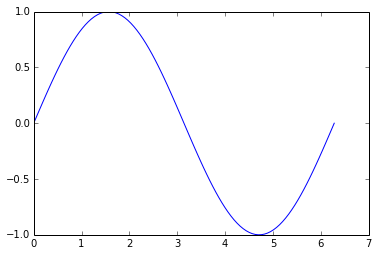

In [56]:
import matplotlib.pyplot as plt
plt.plot(t, y)

We can also overlay plots

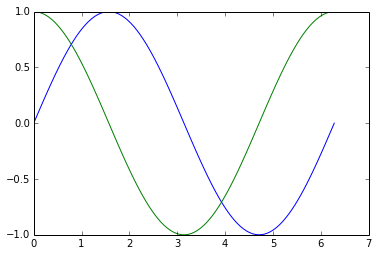

In [57]:
plt.plot(t, y)
plt.plot(t, np.cos(t))

or make subplots that share the same x axis

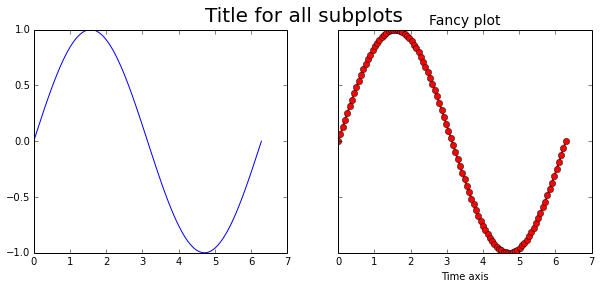

In [59]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 4))
ax1.plot(t, y)
ax2.plot(t, y, 'ro-', linewidth=2.0)  # just to demonstrate the possibilities
ax2.set_title('Fancy plot', fontsize=14)
ax2.set_xlabel('Time axis')
fig.suptitle('Title for all subplots', fontsize=20)

In [ ]:
# your code here

** Q5 ** _Define some randomly distributed with a mean of 50 and standard deviation of 20. Plot its histogram and verify that the mean of the histogram roughly coincides with 50. Try some beautifications to the plots (changing the facecolor to green, make it alpha transparent, remove the edge from the bars in the histogram). Can you save it as a pdf? As a bonus, now try doing the same in Matlab and compare :)_

<h2><span style="color:green;">scikit-learn</span></h2>

scikit-learn is an advanced machine-learning package. We will explore classification, cross validation and grid search.

## Classification

In this section, we will use an SVM on the [MNIST digits dataset](http://yann.lecun.com/exdb/mnist/) to train a classifier to predict the labels of the last sample. 

All the sample datasets in scikit-learn can be found in the `datasets` module. Let us inspect the digits dataset first.

In [70]:
from sklearn import datasets
digits = datasets.load_digits()
print('Data')
print(digits.data)

print('Target')
print(digits.target)

Data
[[  0.   0.   5. ...,   0.   0.   0.]
 [  0.   0.   0. ...,  10.   0.   0.]
 [  0.   0.   0. ...,  16.   9.   0.]
 ..., 
 [  0.   0.   1. ...,   6.   0.   0.]
 [  0.   0.   2. ...,  12.   0.   0.]
 [  0.   0.  10. ...,  12.   1.   0.]]
Target
[0 1 2 ..., 8 9 8]


In scikit-learn, the feature vector is always in the form of (n_samples, n_features). It is already conveniently reshaped for us. However, if we would like to use the original images, we can always reshape it like this

In [71]:
data = digits.images.reshape((digits.images.shape[0], -1))

and then we can take a look at the reshaped data (compared to scikit-learn)

In [72]:
print('scikit-learn: n_samples = %d, n_features = %d' % (digits.data.shape[0], digits.data.shape[1]))
print('myfeatures: n_samples = %d, n_features = %d' % (data.shape[0], data.shape[1]))

scikit-learn: n_samples = 1797, n_features = 64
myfeatures: n_samples = 1797, n_features = 64


The main object in scikit-learn is an `estimator`. An `estimator` implements three important methods: `fit`, `transform` and `predict`. The `fit` method is used to estimate the parameters of a model. The `transform` method transforms the data. This is often used for feature extraction or feature selection. The `predict` method predicts the labels.

First, let us instantiate an estimator object. We will use a Support Vector Machine (SVM) with Radial Basis Function (RBF) kernel.

In [73]:
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.)

Next, we can train the SVM using all but the last sample.

In [74]:
clf.fit(digits.data[:-1], digits.target[:-1])

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0, degree=3,
  gamma=0.001, kernel='rbf', max_iter=-1, probability=False,
  random_state=None, shrinking=True, tol=0.001, verbose=False)

And then we can ask our SVM classifier to predict the label of the last sample

predicted label = 8


(-0.5, 7.5, 7.5, -0.5)

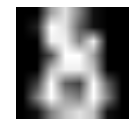

In [75]:
label = clf.predict(digits.data[-1])
print('predicted label = %d' % label)

# show the corresponding image
plt.figure(figsize = (2,2))
plt.imshow(digits.images[-1], cmap=plt.cm.gray)
plt.axis('off')

Because most scikit-learn objects follow a similar API, it is very easy to try other classifiers by simply changing `clf = svm.SVC(gamma=0.001, C=100.)` to any other classifier.

## Cross Validation

To avoid dataset biases, we must train and test on different subsets of the data to check model performance.

First, let us instantiate an iterator for cross validation. scikit-learn provides a bunch of iterators for cross validation: `KFold`, `StratifiedKFold`, `LeaveOneOut` etc.  Here is a [complete list](http://scikit-learn.org/stable/modules/cross_validation.html).

In [77]:
from sklearn.cross_validation import ShuffleSplit
cv = ShuffleSplit(digits.data.shape[0], 5, test_size=0.2, random_state=42)

Next, we can either iterate over the splits using a simple for loop

In [78]:
for ii, (train, test) in enumerate(cv):

    clf.fit(digits.data[train], digits.target[train])
    pred_labels = clf.predict(digits.data[test])
    score = clf.score(digits.data[test], digits.target[test])
    
    print('Fold %d, accuracy =  %0.2f' % (ii + 1, score))

Fold 1, accuracy =  0.99
Fold 2, accuracy =  0.99
Fold 3, accuracy =  0.99
Fold 4, accuracy =  0.99
Fold 5, accuracy =  0.98


We can do all this in one line using the `cross_val_score` method

In [79]:
from sklearn.cross_validation import cross_val_score
cross_val_score(clf, X=digits.data, y=digits.target, cv=cv)

array([ 0.98888889,  0.99166667,  0.98888889,  0.99444444,  0.98333333])

## Grid Search

Here, we had arbitrarily selected an 'rbf' kernel, C=100 and gamma=0.001 and this gave us good results. However, this is not always the case. We may have to try different parameters of the model to get good results. This can be done using grid search. Let us first define the parameters for grid search as a dictionary.

In [81]:
grid_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                   'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

Next, we provide the `GridSearchCV` object the classifier object, the parameters to be tuned, the cross-validation iterator and the scoring function to compute.

In [82]:
from sklearn.grid_search import GridSearchCV
clf_grid = GridSearchCV(clf, grid_parameters, cv=cv, scoring='accuracy')
clf_grid.fit(digits.data, digits.target)  # Do grid search

GridSearchCV(cv=ShuffleSplit(1797, n_iter=5, test_size=0.2, indices=True, random_state=42),
       estimator=SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0, degree=3,
  gamma=0.001, kernel='rbf', max_iter=-1, probability=False,
  random_state=None, shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid=[{'kernel': ['rbf'], 'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001]}, {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring='accuracy', verbose=0)

That's it! We can now print the parameters of the model which gave the best result.

In [83]:
print(clf_grid.best_estimator_)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.001,
  kernel=rbf, max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


---
**Q6** _Can you plot the cross validation accuracies as a function of the parameter C (1e-8, 1e-7, ..., 1e3) for a linear kernel?_

HINT: Use `np.logspace` to get a uniformly spaced grid of points in log space and use `plt.semilogx` to plot them.

In [83]:
# your code here